# Tuning Neural Net

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import ValidationCurveDisplay

# Load the dataset
data = pd.read_csv('data/diabetic_data_formatted.csv')

# Remove the columns that have ~0.5 or more '?'
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

# Replace <30 or >30 days readmission to YES
data['readmitted'] = data['readmitted'].replace(1, 0)
data['readmitted'] = data['readmitted'].replace(0, 0)

# Select target column to predict
X = data.drop(columns=['readmitted'])
y = data['readmitted']


# Get the unique class names from the target variable
class_names = ['YES', 'NO']

# Encode strings to unique integers
le = LabelEncoder()

X_encoded = X
y_encoded = y

# Find Baseline Performance
We defien the baseline neural network as one that has a number of neurons in a hiddern layers equal to the number of features

In [3]:
# Define baseline neural network model
NN_model = MLPClassifier(hidden_layer_sizes=(48,1),random_state=42, max_iter=200)

def getResults(model):

    # start timing the model
    start = time.time()
    
    # Define GridSearchCV parameter grid
    param_grid = NN_model.get_params()

    print(param_grid)

    for key in param_grid:
        param_grid[key] = [param_grid[key]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=42)

    
    # Implement GridSearchCV for SVC
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)

    
    # Evaluate accuracy

    print('\nCross validated score using 4 folds:')
        
    print('\n Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    

    # Evaluate precision
    print('\n Precision: %.2f' % precision_score(y_test, y_pred, average='macro'))

    
    # Evaluate Recall
    print('\n Recall: %.2f' % recall_score(y_test, y_pred, average='macro'))

    
    # Evaluate f1
    print('\n f1: %.2f' % f1_score(y_test, y_pred, average='macro'))    


    # stop timing the model
    end = time.time()

    # calcualate total time
    execution_time = end - start
    
    print('\nExecution Time: %.2f' % execution_time + "s")

getResults(NN_model)


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (48, 1), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.53

 Precision: 0.27

 Recall: 0.50

 f1: 0.35

Execution Time: 4.49s


C:\Users\Adz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Creating a Validation Curve 

In [4]:
def displayValidationCurve(model, p_name, p_range, score):
    disp = ValidationCurveDisplay.from_estimator(
        MLPClassifier(),
        X_encoded,
        y_encoded,
        param_name=p_name,
        param_range=p_range,
        score_type="both",
        n_jobs=-1,
        score_name=score,
        cv=4
    )
    disp.ax_.set_title(score + " Validation Curve for Neural Network")
    disp.ax_.set_xlabel(p_name)
    disp.ax_.set_ylim(0.0, 1.1)
    plt.show()

# Listing Hyperparamters

In [5]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Number of neurons in the hidden layer(s)
    activation='relu',          # Activation function for hidden layers: {'identity', 'logistic', 'tanh', 'relu'}
    solver='adam',              # Solver for weight optimization: {'lbfgs', 'sgd', 'adam'}
    alpha=0.0001,               # L2 penalty (regularization term)
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule: {'constant', 'invscaling', 'adaptive'}
    learning_rate_init=0.001,   # Initial learning rate
    power_t=0.5,                # Exponent for inverse scaling learning rate
    max_iter=200,               # Maximum number of iterations
    shuffle=True,               # Whether to shuffle samples in each iteration
    random_state=None,          # Seed for random number generator
    tol=1e-4,                   # Tolerance for optimization termination
    verbose=False,              # Whether to print progress messages
    warm_start=False,           # Whether to reuse the solution from a previous call
    momentum=0.9,               # Momentum for gradient descent update
    n_iter_no_change=10,        # Max iterations without improvement to terminate
    early_stopping=False,       # Whether to use early stopping
    validation_fraction=0.1,    # Proportion of training data for validation (if early_stopping=True)
    beta_1=0.9,                 # Exponential decay rate for 1st moment in Adam optimizer
    beta_2=0.999,               # Exponential decay rate for 2nd moment in Adam optimizer
    epsilon=1e-8,               # Value for numerical stability in Adam optimizer
)

# Choosing the most impactful parameters
Finding optimum value for hidden layers
We believe that hidden layers would be the most impactful parameter to the accuracy score, this is because as the number of layers increases the model is able to make more deep connections.

Testing hidden layers at sizes (50,1), (100,1) and (200,1)

In [6]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(50,1)
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 1), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.61

 Precision: 0.61

 Recall: 0.61

 f1: 0.61

Execution Time: 6.17s


In [7]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(100,1)
)
    
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 1), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.53

 Precision: 0.27

 Recall: 0.50

 f1: 0.35

Execution Time: 6.25s


C:\Users\Adz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(200,1)
)
    
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 1), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.53

 Precision: 0.27

 Recall: 0.50

 f1: 0.35

Execution Time: 7.96s


C:\Users\Adz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The validation curve was difficult to plot for hidden layes so was not completed. The number of layers didnt seem to make too much of a difference so it was kept at 100 to reduce processing time

# Find Optimal values for iterations rate
Testing number of iterations

In [9]:
NN_model = MLPClassifier(
    max_iter=10 
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 10, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.48

 Precision: 0.58

 Recall: 0.51

 f1: 0.37

Execution Time: 3.34s


C:\Users\Adz\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
NN_model = MLPClassifier(
    max_iter=100 
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.57

 Precision: 0.58

 Recall: 0.58

 f1: 0.57

Execution Time: 10.18s


In [11]:
NN_model = MLPClassifier(
    max_iter=1000
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.56

 Precision: 0.59

 Recall: 0.57

 f1: 0.54

Execution Time: 23.14s


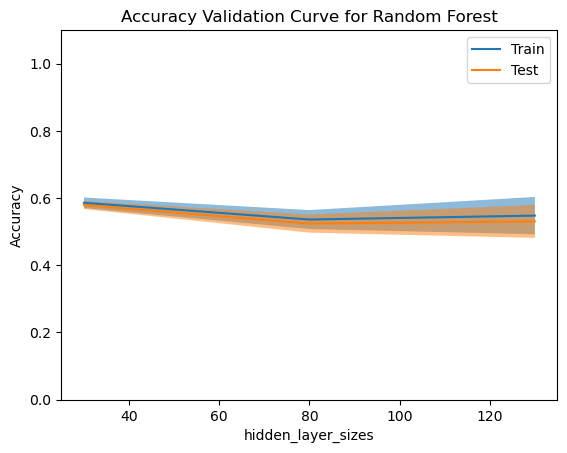

In [12]:
displayValidationCurve(MLPClassifier(), "hidden_layer_sizes", [10, 100, 200], "Accuracy")

The number of iterations seems to perform best around 100, so we set it at that.

# Find optimal values of alpha
Testing types of activation

In [13]:
NN_model = MLPClassifier(
    alpha=0.0001
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.54

 Precision: 0.59

 Recall: 0.56

 f1: 0.52

Execution Time: 14.05s


In [14]:
NN_model = MLPClassifier(
    alpha=0.001
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.59

 Precision: 0.66

 Recall: 0.56

 f1: 0.49

Execution Time: 12.67s


In [15]:
NN_model = MLPClassifier(
    alpha=0.01
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.47

 Precision: 0.65

 Recall: 0.50

 f1: 0.33

Execution Time: 16.24s


In [16]:
NN_model = MLPClassifier(
    alpha=0.1
)
getResults(NN_model)

{'activation': 'relu', 'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.60

 Precision: 0.60

 Recall: 0.59

 f1: 0.58

Execution Time: 13.41s


The alpha that had the most effect on the accuracy was a value of 0.1

# Final Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25)

NN_model = MLPClassifier(hidden_layer_sizes=(100, 1),alpha=0.1, max_iter=100)
NN_model.fit(X_train, y_train)
y_pred = NN_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance:
Accuracy: 0.54
Precision: 0.27
Recall: 0.50
F1 Score: 0.35


C:\Users\Adz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
